DEBUG:cmdstanpy:input tempfile: /tmp/tmp3gkkhk45/3bb6ljyp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3gkkhk45/sy4lwgyh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15798', 'data', 'file=/tmp/tmp3gkkhk45/3bb6ljyp.json', 'init=/tmp/tmp3gkkhk45/sy4lwgyh.json', 'output', 'file=/tmp/tmp3gkkhk45/prophet_modelwm9qlwhr/prophet_model-20250209133311.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:33:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:33:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


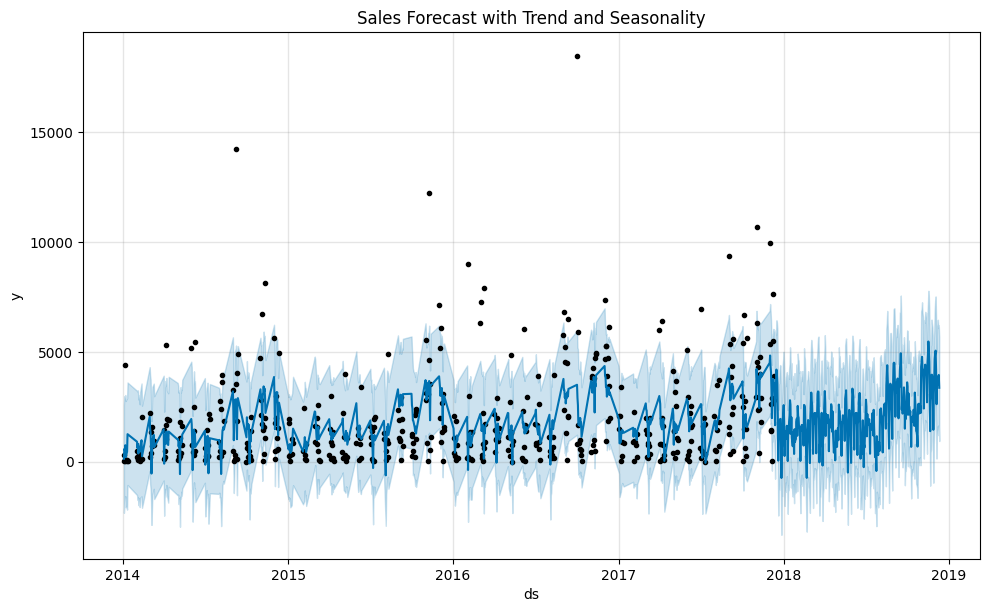

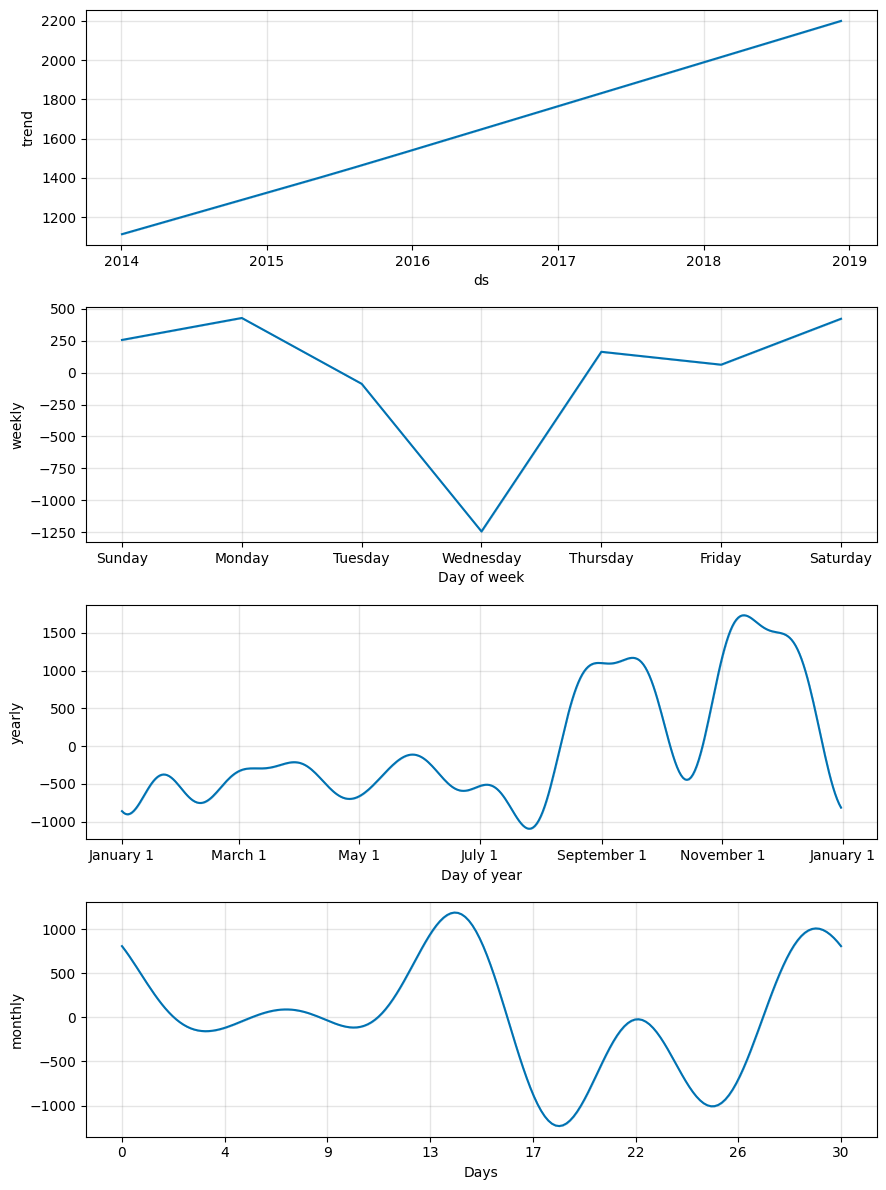

Weekly Forecast:
            ds          yhat    yhat_lower    yhat_upper
254 2018-11-18  30568.098673  13426.881204  47533.490451
255 2018-11-25  22816.929160   5995.348617  39743.697181
256 2018-12-02  24434.834092   7886.233557  40795.165030
257 2018-12-09  26647.226496  10101.676425  44109.855642
258 2018-12-16   7303.101445   2595.742451  11866.677827
Monthly Forecast:
           ds           yhat    yhat_lower     yhat_upper
55 2018-08-31   75150.509667   -556.095091  149742.048385
56 2018-09-30   96265.605782  22782.344477  168802.435524
57 2018-10-31   68131.189232  -6146.095663  142073.863606
58 2018-11-30  112810.398300  40333.442632  185077.258929
59 2018-12-31   43524.370260  17364.069422   70196.305435
Yearly Forecast:
          ds           yhat     yhat_lower    yhat_upper
0 2014-12-31  166303.329244 -127115.570783  4.583188e+05
1 2015-12-31  197037.673617  -71889.475702  4.650392e+05
2 2016-12-31  242886.034284  -61962.164656  5.496086e+05
3 2017-12-31  319308.755323  -

<ipython-input-1-8036cf7a0dbc>:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_forecast = forecast.set_index('ds').resample('M').sum().reset_index()
<ipython-input-1-8036cf7a0dbc>:58: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_forecast = forecast.set_index('ds').resample('Y').sum().reset_index()


In [1]:
import pandas as pd
import os
from prophet import Prophet
import matplotlib.pyplot as plt

# Suppress pandas Arrow string type warnings
pd.options.mode.string_storage = 'python'

# Sample data (assuming it's saved as 'sample_data.csv')
# Load the dataset with proper encoding to handle UnicodeDecodeError
try:
    df = pd.read_csv('/content/Superstore - store analysis.csv', encoding='utf-8')  # Replace with your actual file path
except UnicodeDecodeError:
    df = pd.read_csv('/content/Superstore - store analysis.csv', encoding='ISO-8859-1')

# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Aggregate sales by date
daily_sales = df.groupby('Order Date')['Sales'].sum().reset_index()

# Rename columns for Prophet
daily_sales = daily_sales.rename(columns={'Order Date': 'ds', 'Sales': 'y'})

# Initialize Prophet model with trend, seasonality, and holidays
model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)

# Fit the model
model.fit(daily_sales)

# Create future dataframe for next 365 days
future = model.make_future_dataframe(periods=365)

# Forecast
forecast = model.predict(future)

# Plot forecast
fig1 = model.plot(forecast)
plt.title('Sales Forecast with Trend and Seasonality')
plt.show()

# Plot components (trend, yearly, weekly, monthly seasonality)
fig2 = model.plot_components(forecast)
plt.show()

# Weekly forecast
weekly_forecast = forecast.set_index('ds').resample('W').sum().reset_index()
print("Weekly Forecast:")
print(weekly_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# Monthly forecast
monthly_forecast = forecast.set_index('ds').resample('M').sum().reset_index()
print("Monthly Forecast:")
print(monthly_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# Yearly forecast
yearly_forecast = forecast.set_index('ds').resample('Y').sum().reset_index()
print("Yearly Forecast:")
print(yearly_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())